In [1]:
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms

from models.dcgan import *
from models.lstm import *
from data.MMNIST.mmnist import *
from utils.visualizations import *
from utils.TrainerFP import *

%load_ext autoreload
%autoreload 2
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
mmnist_data_dir = "data/MMNIST/" 
train_loader, val_loader,test_loader = MMNIST(mmnist_data_dir, seq_first = True, device=device)

In [3]:
b = next(iter(val_loader))
b1 = next(iter(val_loader))
b.shape

torch.Size([20, 40, 1, 64, 64])

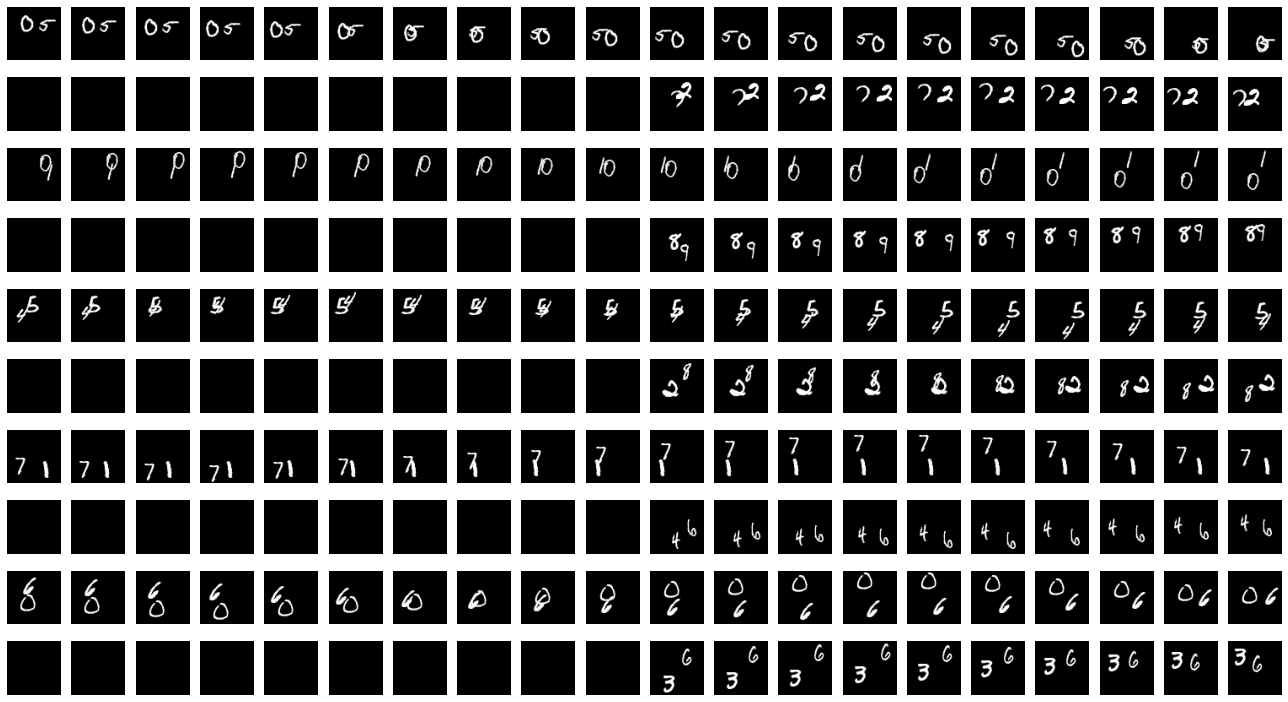

In [4]:
save_grid_batch(b, b1, nsamples = 5, text = "random", batch_first = False, show = True)

In [20]:
save_pred_gifs(b, nsamples=5, text = "test", batch_first = False, show = True)

------------Past Frames (First 10 frames of the sequence)----------------


In [4]:
%load_ext autoreload
%autoreload 2
trainer = TrainerFP(device=device)

In [5]:
trainer.train(train_loader, val_loader,test_loader, device =device)

  0%|          | 0/200 [00:19<?, ?it/s]


KeyboardInterrupt: 

In [2]:
model = DCGANDecoder()
model = model.to(device)
model

DCGANDecoder(
  (c1): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
  )
  (dec): ModuleList(
    (0): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(1024, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (1): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(512, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (2): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(256, 64, kernel_size=(4, 4), s

#**LSTM**

#**DCGAN encoder and decoder**

In [2]:
x = torch.randn(100, 512, 4, 4)
y = torch.cat([x,x],1)

y.shape

torch.Size([100, 1024, 4, 4])

In [5]:
model = DCGANDecoder()
model = model.to(device)
model
# from torchsummary import summary
# summary(model, (64,))

DCGANDecoder(
  (c1): Sequential(
    (0): ConvTranspose2d(128, 512, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
  )
  (dec): ModuleList(
    (0): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(1024, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (1): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(512, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
      )
    )
    (2): ConvTransposeBlock(
      (module): Sequential(
        (0): ConvTranspose2d(256, 64, kernel_size=(4, 4), s

In [6]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = SequentialClassifier(input_dim=28, emb_dim=64, hidden_dim=128, num_layers=2, mode="zeros")
model = latent_lstm(input_dim=64, out_dim=128, hidden_dim=128, num_layers=2, mode="zeros")
model = model.to(device)

In [7]:
model

latent_lstm(
  (enc): Linear(in_features=64, out_features=128, bias=True)
  (lstm): ModuleList(
    (0): LSTMCell(128, 128)
    (1): LSTMCell(128, 128)
  )
  (mu): Linear(in_features=128, out_features=128, bias=True)
  (log_var): Linear(in_features=128, out_features=128, bias=True)
)

#**Moving MNIST Dataset**

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
# from Seq2Seq import Seq2Seq
from torch.utils.data import DataLoader

import io
import imageio
from ipywidgets import widgets, HBox
%load_ext autoreload
%autoreload 2

In [6]:
MovingMNIST = np.load('mnist_test_seq.npy')

In [7]:
MovingMNIST.shape

(20, 10000, 64, 64)

In [20]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=2bb0a7fc110d400cae6375782d844ef9e36ecc338fa70262456da7c8779f9f88
  Stored in directory: c:\users\abc\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [22]:
train_loader, val_loader,test_loader = MMNIST(seq_first = False,device=device)

e:\RWTH\WS21-22\Lab CudaVision\video-prediction\video-prediction\code


In [17]:
b = next(iter(val_loader))

In [18]:
b.shape

torch.Size([40, 1, 20, 64, 64])

In [9]:
x =[]
for i in b:
    x.append(i)
x[0].shape

torch.Size([40, 1, 64, 64])

In [11]:
for i in range(len(x)):
    x[i] = x[i].unsqueeze(0)
x[0].shape

torch.Size([1, 40, 1, 64, 64])

In [12]:
y = x[0]
for t in x[1:]:
    y = torch.cat([y,t],0)
y.shape

torch.Size([20, 40, 1, 64, 64])

In [10]:
from utils.visualizations import *
show_gif_batch(b)

------------Past Frames (First 10 frames of the sequence)----------------


------------Future Frames (Next 10 frames of the sequence)----------------


In [63]:
# Reverse process before displaying
future_batch = future_batch.cpu().numpy() * 255.0     
for video in future_batch.squeeze(1)[:5]:          # Loop over videos
    with io.BytesIO() as gif:
        imageio.mimsave(gif,video.astype(np.uint8),"GIF",fps=5)
        past = Box(children=[widgets.Image(value=gif.getvalue())], layout=box_layout)
        display(VBox([past]))

#**Training Fixed Prior Video Generation Model**

In [11]:
#to be added in config
batch_size=100
past_frames = 10
future_frames = 10
z_dim = 10
g_dim = 128
lr = 0.002
beta = 0.0001
hidden_dim = 256

In [32]:
encoder = DCGANEncoder()
decoder = DCGANDecoder()
encoder = encoder.to(device)
decoder = decoder.to(device)

predictor = predictor_lstm(g_dim+z_dim, g_dim, hidden_dim, num_layers=2)
posterior = latent_lstm(g_dim, z_dim, hidden_dim, num_layers=1)
predictor = predictor.to(device)
posterior = posterior.to(device)
# Decay LR by a factor of 0.1 every 5 epochs
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.2)
predictor_optimizer = torch.optim.Adam(predictor.parameters(), lr=lr, betas = (0.9, 0.999))
posterior_optimizer = torch.optim.Adam(posterior.parameters(), lr=lr, betas = (0.9, 0.999))
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=lr, betas = (0.9, 0.999))
decoder_optimizer = torch.optim.Adam(posterior.parameters(), lr=lr, betas = (0.9, 0.999))


In [33]:
# Loss functions
mse_loss = nn.MSELoss()
# import torch.nn.functional as F
def kld_loss(mu, log_var):
    """
    Combined loss function for joint optimization of 
    prediction and ELBO
    """
    # mse = F.mse_loss(predicted, real, reduction="sum")
#     recons_loss = F.binary_cross_entropy(recons.view(b_size,-1), target.view(b_size,-1), reduction='sum')
    elbo = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    elbo /= batch_size
    # total_loss = mse + elbo*beta
    return elbo

In [34]:
def train_epoch(x):
    predictor.zero_grad()
    posterior.zero_grad()
    encoder.zero_grad()
    decoder.zero_grad()

    # print("hello")

    h_seq = [encoder(x[i]) for i in range(past_frames+future_frames)]
    # print(h_seq[0][0].shape)
    mse =0
    kld = 0
    for i in range(1,past_frames+future_frames):
        h_target = h_seq[i][0]
        if i<past_frames:
            h, skip = h_seq[i-1]
        else:
            h = h_seq[i-1][0]
        # print("here")
        # print(h_target.shape)
        z_t, mu, log_var = posterior(h_target)
        # print("here")
        # print(z_t.shape)
        h_pred = predictor(torch.cat([h, z_t], 1))
        x_pred = decoder([h_pred, skip])
        mse+=mse_loss(x_pred,x[i])
        kld+=kld_loss(mu,log_var)

    total_loss = mse + kld*beta
    total_loss.backward()

    predictor_optimizer.step()
    posterior_optimizer.step()
    encoder_optimizer.step()
    decoder_optimizer.step()

    return mse.data.cpu().numpy()/(past_frames+future_frames), kld.data.cpu().numpy()/(past_frames+future_frames)


In [35]:
num_epochs = 300
for i in range(num_epochs):
    predictor.train()
    posterior.train()
    encoder.train()
    decoder.train() 
    epoch_mse =0
    epoch_kld=0
    epoch_loss =0

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
    for j, images in progress_bar:
        images = images.to(device)

        bs, nc, s, h, w = images.shape
        data = images.view(s, bs, nc, h, w)

        mse, kld = train_epoch(data)
        epoch_mse+=mse
        epoch_kld+=kld
        progress_bar.set_description(f"Epoch {i+1} : mse loss {epoch_mse:.5f}, kld los {epoch_kld: .5f} ")


Epoch 1 : mse loss 0.31350, kld los  0.01481 :   1%|▍                                | 1/80 [06:01<7:55:20, 361.02s/it]


KeyboardInterrupt: 